In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [4]:
train.shape

(21000, 25)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
ID                            21000 non-null int64
LIMIT_BAL                     21000 non-null int64
SEX                           21000 non-null int64
EDUCATION                     21000 non-null int64
MARRIAGE                      21000 non-null int64
AGE                           21000 non-null int64
PAY_0                         21000 non-null int64
PAY_2                         21000 non-null int64
PAY_3                         21000 non-null int64
PAY_4                         21000 non-null int64
PAY_5                         21000 non-null int64
PAY_6                         21000 non-null int64
BILL_AMT1                     21000 non-null int64
BILL_AMT2                     21000 non-null int64
BILL_AMT3                     21000 non-null int64
BILL_AMT4                     21000 non-null int64
BILL_AMT5                     21000 non-null int64
BILL_AMT6               

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


In [7]:
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [8]:
test.shape

(9000, 24)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
ID           9000 non-null int64
LIMIT_BAL    9000 non-null int64
SEX          9000 non-null int64
EDUCATION    9000 non-null int64
MARRIAGE     9000 non-null int64
AGE          9000 non-null int64
PAY_0        9000 non-null int64
PAY_2        9000 non-null int64
PAY_3        9000 non-null int64
PAY_4        9000 non-null int64
PAY_5        9000 non-null int64
PAY_6        9000 non-null int64
BILL_AMT1    9000 non-null int64
BILL_AMT2    9000 non-null int64
BILL_AMT3    9000 non-null int64
BILL_AMT4    9000 non-null int64
BILL_AMT5    9000 non-null int64
BILL_AMT6    9000 non-null int64
PAY_AMT1     9000 non-null int64
PAY_AMT2     9000 non-null int64
PAY_AMT3     9000 non-null int64
PAY_AMT4     9000 non-null int64
PAY_AMT5     9000 non-null int64
PAY_AMT6     9000 non-null int64
dtypes: int64(24)
memory usage: 1.6 MB


Text(0.5, 1.0, 'DITRIBUTION')

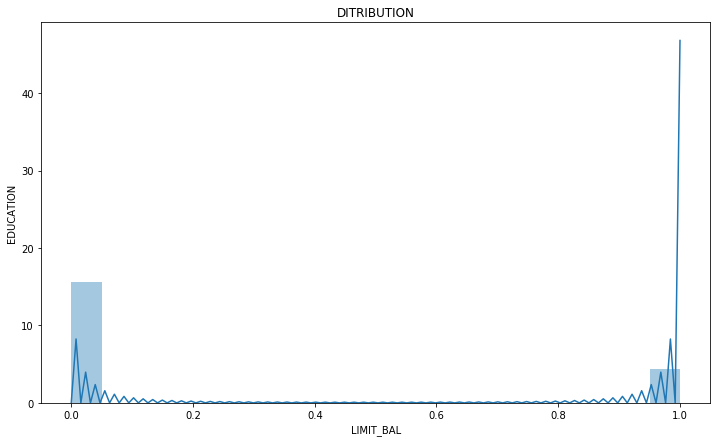

In [10]:
plt.figure(figsize=(12,7))
sns.distplot(train.default_payment_next_month,bins=20)
plt.xlabel('LIMIT_BAL')
plt.ylabel('EDUCATION')
plt.title('DITRIBUTION')

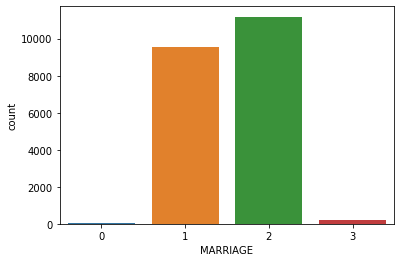

In [11]:
sns.countplot(train.MARRIAGE)

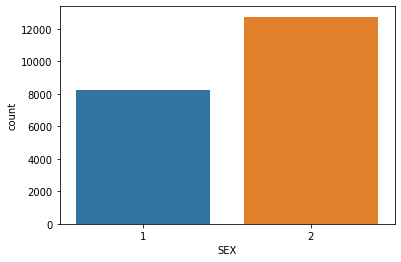

In [12]:
sns.countplot(train.SEX)

In [13]:
train['AGE'].value_counts()

29    1088
27    1052
28     993
30     972
26     879
25     847
32     832
31     825
34     821
33     815
36     786
35     784
24     779
37     738
38     661
39     660
23     646
40     602
41     596
42     550
44     487
43     470
45     429
46     412
22     404
47     331
48     330
49     315
50     268
51     243
53     223
52     207
54     175
55     136
56     124
58      88
57      85
59      63
60      51
21      45
61      40
63      27
62      26
66      18
64      17
65      16
67      11
69      11
70       8
71       3
68       3
75       3
72       2
73       2
74       1
Name: AGE, dtype: int64

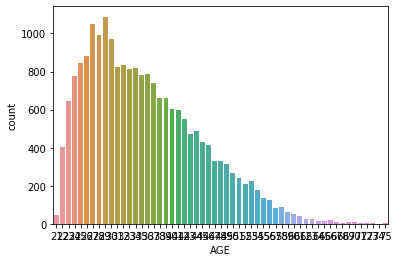

In [14]:
sns.countplot(train.AGE)

In [15]:
data = train.columns.tolist()
data.remove('default_payment_next_month')
X, Y = train[data], train['default_payment_next_month']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.4, random_state=20)

In [18]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

In [19]:
x_train_sc.shape

(12600, 24)

In [20]:
x_test_sc.shape

(8400, 24)

In [26]:
# Using Classification Algorithms
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
lr.fit(x_train_sc,Y_train)

C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.intercept_

array([-1.4936164])

In [29]:
lr.coef_

array([[-0.00409707, -0.07762703, -0.02563516, -0.08462746, -0.07461651,
         0.03565439,  0.66180022,  0.14979962,  0.04123871,  0.03125516,
        -0.01026972,  0.02911782, -0.31024541,  0.01706282,  0.2559381 ,
        -0.09469911,  0.04372657,  0.00493791, -0.20594854, -0.32585726,
        -0.15390103, -0.0762301 , -0.05937404, -0.10731797]])

In [33]:
lr_Pred = lr.predict(x_test_sc)

In [32]:
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

In [35]:
print('Confusion Matrix of LR: \n',confusion_matrix(Y_test,lr_Pred))

Confusion Matrix of LR: 
 [[6362  169]
 [1428  441]]


In [36]:
print('Accuracy Score of LR: \n',accuracy_score(Y_test,lr_Pred))
print('Precision Score of LR: \n',precision_score(Y_test,lr_Pred))
print('Recall Score of LR: \n',recall_score(Y_test,lr_Pred))
print('F1 Score of LR: \n',f1_score(Y_test,lr_Pred))

Accuracy Score of LR: 
 0.8098809523809524
Precision Score of LR: 
 0.7229508196721312
Recall Score of LR: 
 0.23595505617977527
F1 Score of LR: 
 0.3557886244453409


In [38]:
# By Using Support Vector Machine Classification Algorithm
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_sc,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
svc_Pred = svc.predict(x_test_sc)

In [40]:
print('Confusion Matrix of SVM: \n',confusion_matrix(Y_test,svc_Pred))
print('Accuracy Score of SVM: \n',accuracy_score(Y_test,svc_Pred))
print('Precision Score of SVM: \n',precision_score(Y_test,svc_Pred))
print('Recall Score of SVM: \n',recall_score(Y_test,svc_Pred))
print('F1 Score of SVM: \n',f1_score(Y_test,svc_Pred))

Confusion Matrix of SVM: 
 [[6267  264]
 [1253  616]]
Accuracy Score of SVM: 
 0.8194047619047619
Precision Score of SVM: 
 0.7
Recall Score of SVM: 
 0.3295880149812734
F1 Score of SVM: 
 0.44816296835212804


In [41]:
# By Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train_sc,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
dc_Pred = dc.predict(x_test_sc)

In [43]:
print('Confusion Matrix of DC : \n',confusion_matrix(Y_test,dc_Pred))
print('Accuracy Score of DC: \n',accuracy_score(Y_test,dc_Pred))
print('Precision Score of DC: \n',precision_score(Y_test,dc_Pred))
print('Recall Score of DC: \n',recall_score(Y_test,dc_Pred))
print('F1 Score of DC: \n',f1_score(Y_test,dc_Pred))

Confusion Matrix of DC : 
 [[5316 1215]
 [1088  781]]
Accuracy Score of DC: 
 0.7258333333333333
Precision Score of DC: 
 0.3912825651302605
Recall Score of DC: 
 0.4178705189941145
F1 Score of DC: 
 0.40413971539456656


In [44]:
# By Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_sc,Y_train)

C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
rf_Pred = rf.predict(x_test_sc)

In [46]:
print('Confusion Matrix of RF : \n',confusion_matrix(Y_test,rf_Pred))
print('Accuracy Score of RF: \n',accuracy_score(Y_test,rf_Pred))
print('Precision Score of RF: \n',precision_score(Y_test,rf_Pred))
print('Recall Score of RF: \n',recall_score(Y_test,rf_Pred))
print('F1 Score of RF: \n',f1_score(Y_test,rf_Pred))

Confusion Matrix of RF : 
 [[6194  337]
 [1306  563]]
Accuracy Score of RF: 
 0.804404761904762
Precision Score of RF: 
 0.6255555555555555
Recall Score of RF: 
 0.3012306046013911
F1 Score of RF: 
 0.40664499819429395


In [47]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(x_train_sc,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [48]:
ad_Pred = ad.predict(x_test_sc)

In [49]:
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(Y_test,ad_Pred))
print('Accuracy Score of AdaBoost: \n',accuracy_score(Y_test,ad_Pred))
print('Precision Score of AdaBoost: \n',precision_score(Y_test,ad_Pred))
print('Recall Score of AdaBoost: \n',recall_score(Y_test,ad_Pred))
print('F1 Score of AdaBoost: \n',f1_score(Y_test,ad_Pred))

Confusion Matrix of AdaBoost : 
 [[6267  264]
 [1295  574]]
Accuracy Score of AdaBoost: 
 0.8144047619047619
Precision Score of AdaBoost: 
 0.684964200477327
Recall Score of AdaBoost: 
 0.30711610486891383
F1 Score of AdaBoost: 
 0.4240857037310676


In [50]:
# Applying for GridSearch
from sklearn.model_selection import GridSearchCV
parameters =  {"n_estimators": [3,5,10],   # you can use any numbers, it wouldnt be affect the final result. no of decision trees.
              "criterion":['gini','entropy'],
              "max_depth": [2,3,5],     # Here you can use any numbers but if more depth then it takes more time for output.
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator=rf,
                          param_grid= parameters,
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(x_train_sc,Y_train)

In [51]:
parameters

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 5],
 'min_samples_leaf': [1, 5, 15],
 'min_samples_split': [10, 20, 30],
 'min_weight_fraction_leaf': [0.1, 0.05, 0.005],
 'n_estimators': [3, 5, 10]}

In [52]:
best_accuracy = grid_search.best_score_

In [53]:
best_accuracy

0.815

In [54]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.005,
 'n_estimators': 5}

In [65]:
pred = grid_search.predict(x_test_sc)
print(pred)

[0 0 0 ... 0 0 0]


In [55]:
from sklearn.ensemble import RandomForestClassifier
Tune_RF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
Tune_RF.fit(x_train_sc,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=30,
                       min_weight_fraction_leaf=0.005, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
print('Confusion Matrix of TuneRF : \n',confusion_matrix(Y_test,Tune_RF.predict(x_test_sc)))
print('Accuracy Score of TuneRF: \n',accuracy_score(Y_test,Tune_RF.predict(x_test_sc)))
print('Precision Score of TuneRF: \n',precision_score(Y_test,Tune_RF.predict(x_test_sc)))
print('Recall Score of TuneRF: \n',recall_score(Y_test,Tune_RF.predict(x_test_sc)))
print('F1 Score of TuneRF: \n',f1_score(Y_test,Tune_RF.predict(x_test_sc)))

Confusion Matrix of TuneRF : 
 [[6237  294]
 [1253  616]]
Accuracy Score of TuneRF: 
 0.8158333333333333
Precision Score of TuneRF: 
 0.676923076923077
Recall Score of TuneRF: 
 0.3295880149812734
F1 Score of TuneRF: 
 0.4433249370277078


In [66]:
Output = pd.DataFrame(pred,columns=['Prediction'])
Output

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
8395,0
8396,0
8397,0
8398,0
